# Python APIs
## Jackie McGuire

This code uses the Open Weather Map API to retrieve a user-defined number of cities and create scatterplots for Temperature, Humidity, Cloudiness and Windiness. 

Note: There is a 1-second wait built-in wile looping between cities to avoid going over the 60-city per minute of the free OMW account API Key. 

I'm not sure the use of citipy was best here, versus passing coordinates to the API. Citipy returns a name and country code when given coordinates, but I'm not sure how the OMW API figures out which 'Lincoln' or 'Concord' to pick in the US when passing those in search parameters. I suppose that since the data is random, it may not matter, but if there is some format used by the API to determine which city of a variety of states in the given country to querey, that could impact the analysis.

## Observable Trends
1) As expected, the Temperature graph shows that it is currently winter in the Northern Hemisphere, with warmer temperatures in the negative latitude numbers (south of the Equator) and cooler temperatures north of the Equator. 

2) Humidity skews significantly closer to 100% than I would have predicted.

3) Cloudiness appears to be measured in 5% increments, based on grouping of scatter plot.

In [2]:
# Set dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import sys 
import os 
import apikeys
from citipy import citipy
import random
import time
import datetime

In [ ]:
# Set API call information
url = "http://api.openweathermap.org/data/2.5/weather"

params = {'appid': apikeys.OMW_API_KEY,
          'q': '',
          'units': 'metric'}
# Set empty list for Weather Data
weather_data = []
# Set empty set for cities (to prevent repeat-data)
cities = set() # Using set prevents duplicates
# User input for number of cities
dataset_number = input("How many random cities (@60 cities per minute) would you like to get data for?")
# Give user estimate of time to complete request
print("Fetching "+dataset_number+" records. This will take approximately "+str(int(dataset_number)//60)+" minutes and "+str(int(dataset_number)%60)+" seconds.")

In [29]:

apireq = 1 #This counts API requests 
idx=1 #This counts cities successfully added (excluding 'city not found')
#using while len(weather_data) here helps to make sure we get the full number of cities, accounting for 404 errors.
while len(weather_data)<int(dataset_number):
    oldcitieslen = len(cities)
    newcitieslen = len(cities)
    while newcitieslen==oldcitieslen:
        city = citipy.nearest_city((random.randint(-9000,9000)/100),(random.randint(-18000,18000)/100))
        city_name = city.city_name
        country_code = city.country_code
        newcity=(city_name+","+country_code.upper())
        cities.add(newcity)
        newcitieslen = len(cities)
    params['q'] = newcity
    response=req.get(url, params=params)
    response_json = response.json()
    if response_json["cod"]==200:
        weather_data.append(response.json())
        print("API Request ",apireq, ", City Number", idx , ", Weather Data For ", newcity,"\n", response.url, "...Successful")
        apireq=apireq+1
        idx=idx+1
        time.sleep(1)   
    else:
        print("API Request ", apireq , " Weather Data For ", newcity,"\n", response.url, "...ERROR:", response_json["cod"], response_json["message"],"CITY NOT ADDED TO DATA")
        apireq=apireq+1
        time.sleep(1)

How many random cities (@60 cities per minute) would you like to get data for?500
Fetching 500 records. This will take approximately 8 minutes and 20 seconds.
API Request  1 , City Number 1 , Weather Data For  narsaq,GL 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=narsaq%2CGL&units=metric ...Successful
API Request  2 , City Number 2 , Weather Data For  ancud,CL 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=ancud%2CCL&units=metric ...Successful
API Request  3 , City Number 3 , Weather Data For  ushuaia,AR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=ushuaia%2CAR&units=metric ...Successful
API Request  4  Weather Data For  rudnytsya,UA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=rudnytsya%2CUA&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  5 , City Number 4 , Weather Data For  kap

API Request  42 , City Number 35 , Weather Data For  aden,YE 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=aden%2CYE&units=metric ...Successful
API Request  43 , City Number 36 , Weather Data For  aparecida do taboado,BR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=aparecida+do+taboado%2CBR&units=metric ...Successful
API Request  44 , City Number 37 , Weather Data For  laguna,BR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=laguna%2CBR&units=metric ...Successful
API Request  45 , City Number 38 , Weather Data For  nalut,LY 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=nalut%2CLY&units=metric ...Successful
API Request  46 , City Number 39 , Weather Data For  albany,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=albany%2CAU&units=metric ...Successful
API Request  47 , 

API Request  84 , City Number 72 , Weather Data For  burnie,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=burnie%2CAU&units=metric ...Successful
API Request  85 , City Number 73 , Weather Data For  victoria,SC 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=victoria%2CSC&units=metric ...Successful
API Request  86 , City Number 74 , Weather Data For  yantal,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=yantal%2CRU&units=metric ...Successful
API Request  87 , City Number 75 , Weather Data For  new norfolk,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=new+norfolk%2CAU&units=metric ...Successful
API Request  88 , City Number 76 , Weather Data For  east london,ZA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=east+london%2CZA&units=metric ...Successful
API Request  89 

API Request  125 , City Number 106 , Weather Data For  new glasgow,CA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=new+glasgow%2CCA&units=metric ...Successful
API Request  126 , City Number 107 , Weather Data For  andenes,NO 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=andenes%2CNO&units=metric ...Successful
API Request  127 , City Number 108 , Weather Data For  anlu,CN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=anlu%2CCN&units=metric ...Successful
API Request  128 , City Number 109 , Weather Data For  hithadhoo,MV 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=hithadhoo%2CMV&units=metric ...Successful
API Request  129 , City Number 110 , Weather Data For  port hedland,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=port+hedland%2CAU&units=metric ...Successful
API 

API Request  166 , City Number 143 , Weather Data For  xinpu,CN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=xinpu%2CCN&units=metric ...Successful
API Request  167 , City Number 144 , Weather Data For  inyonga,TZ 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=inyonga%2CTZ&units=metric ...Successful
API Request  168 , City Number 145 , Weather Data For  la asuncion,VE 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=la+asuncion%2CVE&units=metric ...Successful
API Request  169 , City Number 146 , Weather Data For  ipilan,PH 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=ipilan%2CPH&units=metric ...Successful
API Request  170 , City Number 147 , Weather Data For  banda aceh,ID 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=banda+aceh%2CID&units=metric ...Successful
API Request 

API Request  207 , City Number 181 , Weather Data For  port lincoln,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=port+lincoln%2CAU&units=metric ...Successful
API Request  208 , City Number 182 , Weather Data For  faanui,PF 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=faanui%2CPF&units=metric ...Successful
API Request  209 , City Number 183 , Weather Data For  egvekinot,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=egvekinot%2CRU&units=metric ...Successful
API Request  210 , City Number 184 , Weather Data For  ilulissat,GL 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=ilulissat%2CGL&units=metric ...Successful
API Request  211 , City Number 185 , Weather Data For  zyryanka,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=zyryanka%2CRU&units=metric ...Successful
AP

API Request  248 , City Number 216 , Weather Data For  orangeburg,US 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=orangeburg%2CUS&units=metric ...Successful
API Request  249  Weather Data For  aflu,DZ 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=aflu%2CDZ&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  250 , City Number 217 , Weather Data For  vanavara,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=vanavara%2CRU&units=metric ...Successful
API Request  251 , City Number 218 , Weather Data For  hami,CN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=hami%2CCN&units=metric ...Successful
API Request  252 , City Number 219 , Weather Data For  rio grande,BR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=rio+grande%2CBR&units=metric ...Successful

API Request  289  Weather Data For  grand centre,CA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=grand+centre%2CCA&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  290  Weather Data For  hervey bay,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=hervey+bay%2CAU&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  291 , City Number 249 , Weather Data For  manacapuru,BR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=manacapuru%2CBR&units=metric ...Successful
API Request  292 , City Number 250 , Weather Data For  omboue,GA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=omboue%2CGA&units=metric ...Successful
API Request  293 , City Number 251 , Weather Data For  ulaangom,MN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=u

API Request  330 , City Number 281 , Weather Data For  valverde del camino,ES 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=valverde+del+camino%2CES&units=metric ...Successful
API Request  331 , City Number 282 , Weather Data For  komsomolskiy,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=komsomolskiy%2CRU&units=metric ...Successful
API Request  332 , City Number 283 , Weather Data For  portree,GB 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=portree%2CGB&units=metric ...Successful
API Request  333 , City Number 284 , Weather Data For  hovd,MN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=hovd%2CMN&units=metric ...Successful
API Request  334 , City Number 285 , Weather Data For  homer,US 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=homer%2CUS&units=metric ...Success

API Request  371 , City Number 318 , Weather Data For  south river,CA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=south+river%2CCA&units=metric ...Successful
API Request  372  Weather Data For  trinidad,BO 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=trinidad%2CBO&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  373 , City Number 319 , Weather Data For  portland,AU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=portland%2CAU&units=metric ...Successful
API Request  374 , City Number 320 , Weather Data For  springdale,CA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=springdale%2CCA&units=metric ...Successful
API Request  375 , City Number 321 , Weather Data For  shahr-e babak,IR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=shahr-e+babak%2CI

API Request  412 , City Number 352 , Weather Data For  matamoros,MX 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=matamoros%2CMX&units=metric ...Successful
API Request  413 , City Number 353 , Weather Data For  erzin,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=erzin%2CRU&units=metric ...Successful
API Request  414 , City Number 354 , Weather Data For  carutapera,BR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=carutapera%2CBR&units=metric ...Successful
API Request  415 , City Number 355 , Weather Data For  cockburn town,BS 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=cockburn+town%2CBS&units=metric ...Successful
API Request  416 , City Number 356 , Weather Data For  rajkot,IN 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=rajkot%2CIN&units=metric ...Successful
API 

API Request  453 , City Number 386 , Weather Data For  jacqueville,CI 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=jacqueville%2CCI&units=metric ...Successful
API Request  454 , City Number 387 , Weather Data For  rifu,JP 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=rifu%2CJP&units=metric ...Successful
API Request  455 , City Number 388 , Weather Data For  nogent-le-rotrou,FR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=nogent-le-rotrou%2CFR&units=metric ...Successful
API Request  456 , City Number 389 , Weather Data For  padang,ID 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=padang%2CID&units=metric ...Successful
API Request  457 , City Number 390 , Weather Data For  lagunas,PE 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=lagunas%2CPE&units=metric ...Successful
AP

API Request  494  Weather Data For  sohag,EG 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=sohag%2CEG&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  495 , City Number 420 , Weather Data For  bambanglipuro,ID 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=bambanglipuro%2CID&units=metric ...Successful
API Request  496 , City Number 421 , Weather Data For  beira,MZ 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=beira%2CMZ&units=metric ...Successful
API Request  497 , City Number 422 , Weather Data For  betare oya,CM 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=betare+oya%2CCM&units=metric ...Successful
API Request  498 , City Number 423 , Weather Data For  villa bruzual,VE 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=villa+bruzual%2CVE&units=

API Request  535 , City Number 456 , Weather Data For  turukhansk,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=turukhansk%2CRU&units=metric ...Successful
API Request  536 , City Number 457 , Weather Data For  tugulym,RU 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=tugulym%2CRU&units=metric ...Successful
API Request  537  Weather Data For  waterfoot,GB 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=waterfoot%2CGB&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  538 , City Number 458 , Weather Data For  arandis,NA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=arandis%2CNA&units=metric ...Successful
API Request  539 , City Number 459 , Weather Data For  fort nelson,CA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=fort+nelson%2CCA&units=metr

API Request  576  Weather Data For  prykolotne,UA 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=prykolotne%2CUA&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  577  Weather Data For  gulshat,KZ 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=gulshat%2CKZ&units=metric ...ERROR: 404 city not found CITY NOT ADDED TO DATA
API Request  578 , City Number 488 , Weather Data For  plouzane,FR 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=plouzane%2CFR&units=metric ...Successful
API Request  579 , City Number 489 , Weather Data For  huarmey,PE 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=huarmey%2CPE&units=metric ...Successful
API Request  580 , City Number 490 , Weather Data For  buala,SB 
 http://api.openweathermap.org/data/2.5/weather?appid=4dbb73a13873cd025cdc7281bc5c34e8&q=buala%2CSB&units

In [37]:
# Print successrate of API calls
print ("API Request completed. Error rate was "+str(1-(idx/apireq))+"%. "+str(apireq-1)+" cities fetched, "+str(idx-1)+" cities found.")

API Request completed. Error rate was 0.15514333895446886%. 592 cities fetched, 500 cities found.


In [38]:
# Set empty lists for API data
name_data=[]
lat_data = []
temp_data = []
humid_data=[]
cloud_data=[]
wind_data=[]
# Create dictionary with lists
weather_dict = {"City Name": name_data,
                            "Temperature": temp_data, 
                            "Latitude": lat_data, 
                           "Humidity":humid_data,
                           "Cloudiness": cloud_data,
                           "Windiness": wind_data}

In [39]:
# Add Weather data to table
for data in weather_data:
        name_data.append(data["name"])
        lat_data.append(data['coord']['lat'])
        temp_data.append(data['main']['temp'])
        humid_data.append(data['main']['humidity'])
        cloud_data.append(data["clouds"]["all"])
        wind_data.append(data["wind"]["speed"])

In [40]:
# Create DataFrame from table
weather_data_df = pd.DataFrame(weather_dict)
# Save DataFrame to csv
weather_data_df.to_csv("weatherdata.csv")

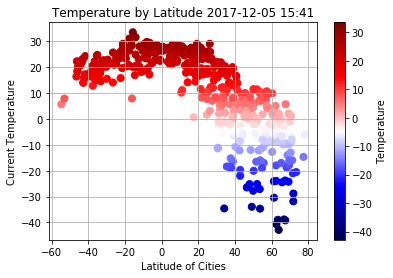

In [41]:
# Set variable for printing current date on charts
now = datetime.datetime.now()
# Define function for creating latitude-based charts with diffrent variables
def latitude_graph(variable):
    fig, ax = plt.subplots()
    weather_data_df.plot(kind="scatter", x="Latitude", y=variable, s=50, c=variable, cmap="seismic", ax=ax)
    ax.set_title(variable+" by Latitude "+(now.strftime("%Y-%m-%d %H:%M")))
    ax.set_xlabel("Latitude of Cities")
    ax.set_ylabel("Current "+variable)
    plt.grid()
    plt.savefig(variable+"ByLatitude")
    plt.show()
# Temperature graph
temp_lat_graph = latitude_graph("Temperature")

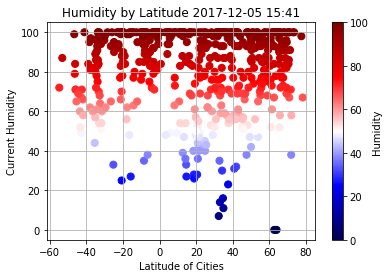

In [42]:
# Humidity Graph
humid_lat_graph =latitude_graph("Humidity")

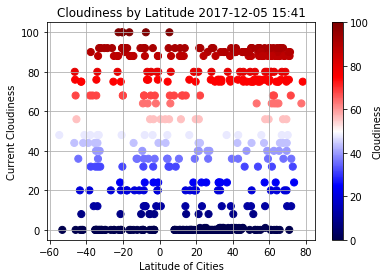

In [43]:
# Cloud Graph
cloud_lat_graph = latitude_graph("Cloudiness")

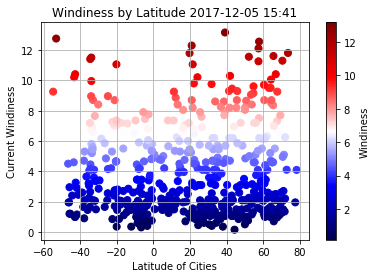

In [44]:
# Wind Graph
wind_lat_graph = latitude_graph("Windiness")